# Fourier Transform
## Physics 481  Week 10  Fall 2017

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.integrate as integrate

## Orthogonal decomposition

Any arbitrary function $f(x)$ can be represented by some combination of _complete_ basis functions $\phi_k(x)$
 
 $$ f(x) = \sum_k c_k \; \phi_k(x) $$

where the coefficients $c_k$ can be found by "projecting" $f(x)$ onto each element of the basis set
in order to determine the coefficients.   
 
 $$ c_k = P \left( f, \phi_k \right ) $$
 
where this projection may be written in terms of an inner product 
 
 $$ c_k = \left < \, f(x)  \, \phi_k(x)  \, \right >_x $$
 
If the inner product of two functions is simply the integral of the two functions multiplied together
 
 $$ c_k = \int f(x) \phi_k(x) $$
 
then we can substitute the expansion for $f(x)$ and exchange the order of summation and integration 
 
 $$ \begin{align} c_k &= \int \sum_j c_j \phi_j(x) \; \phi_k(x) \\ 
 &= \sum_k c_k \int  \phi_j(x) \; \phi_k(x) \end{align}$$
 
where the last step is only true if the basis functions are *orthonormal* (or at least orthogonal)

  $$ \int  \phi_j(x) \; \phi_k(x) = \delta_{j,k}  $$

## Sine Transform

It can be shown that sinusoids are orthogonal and complete over the range $-\infty$ to $+\infty$.  This leads to a definition for the Sine transform

  $$ F(k) = \sqrt{\frac{2}{\pi}} \int_{0}^\infty f(x) ;\ \sin(2\pi x k) \mathrm{d} x. $$


In [38]:
import sympy
from sympy import sine_transform, exp
#from sympy.abc import sx, sk, sa, sb
sx = sympy.Symbol('sx')
sk = sympy.Symbol('sk')
sa = sympy.Symbol('sa')
sb = sympy.Symbol('sb')
sn = sympy.Symbol('sn', positive=True)
sm = sympy.Symbol('sm', positive=True)

In [39]:
funca = sympy.sin(sn*sympy.pi*sx)
funcb = sympy.sin(sm*sympy.pi*sx)                  
func = sympy.integrate( funca*funcb, (sx, -1, 1))
print( sympy.simplify(func) )

Piecewise((1 - sin(2*pi*sn)/(2*pi*sn), Eq(sm, sn)), (2*(-sm*sin(pi*sn)*cos(pi*sm) + sn*sin(pi*sm)*cos(pi*sn))/(pi*(sm**2 - sn**2)), True))


### Examples

In [40]:
funcx = sx*exp(-sa*sx**2)
funck = sine_transform( funcx, sx, sk)
print(funck)
#sympy.plot( [func.subs(a,2), func.subs(a,1)], (x, -5, +5), label='a=1' )

sqrt(2)*sk*exp(-sk**2/(4*sa))/(4*sa**(3/2))


It is very easy to produce a simple plot in sympy.  However, anything more complicated (eg. subplots, multiple curves per plot) seems to be difficult or impossible.

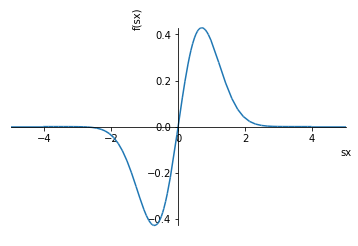

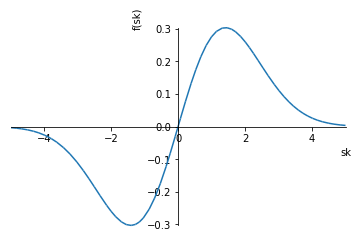

In [41]:
plot1 = sympy.plot( funcx.subs(sa,1), (sx, -5, +5) )
plot2 = sympy.plot( funck.subs(sa,1), (sk, -5, +5) )
#plot1.append( plot2[0] ) ?

For now I will do a relatively crude evaluation over an array.

### Scaling under transformation

Fourier transforming a wide function will tend to produce a narrow function, and vice versa.  The uncertainty principle will result if two observables are related by the Fourier transform 

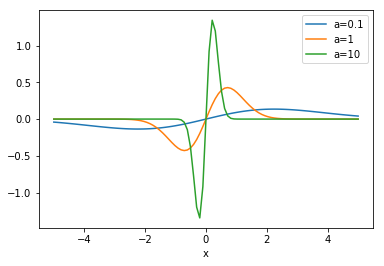

In [42]:
xvals = np.linspace(-5, 5, 99)
for v in [0.1, 1, 10]:
    func = funcx.subs(sa,v) * v
    y = np.array( [func.subs(sx,w) for w in xvals] )
    plt.plot(xvals, y, label='a='+str(v) )
plt.legend(loc=0)
plt.xlabel('x')

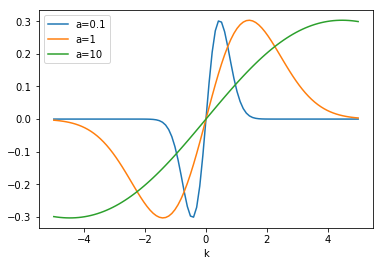

In [43]:
kvals = np.linspace(-5, 5, 99)
for v in [0.1, 1, 10]:
    func = funck.subs(sa,v) * v
    y = np.array( [func.subs(sk,w) for w in kvals] )
    plt.plot(kvals, y, label='a='+str(v) )
plt.legend(loc=0)
plt.xlabel('k')

Note: the Sine transform makes wide functions narrower and vice versa.

## Quadrature
Numpy provides a collection of tools for numerical integration of functions

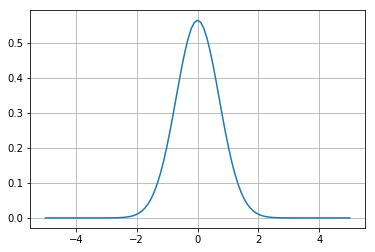

In [283]:
# test function with a Gaussian profile
#
def gfunc(x, width=1.0, offset=0.0):
    arg = (x - offset) / width
    return np.exp(-arg**2 ) / np.sqrt( np.pi * width**2 )

x = np.linspace(-5.0, 5.0, 99)
y = gfunc(x)
plt.plot(x,y)
plt.grid('on')

### The area under a Gaussian should be exactly one.

In [45]:
amount, error = integrate.quad( gfunc, -np.inf, +np.inf )
print(amount,error)

1.0 8.012979942038555e-09


### The integral of an odd function is zero.

In [46]:
afunc = lambda x: gfunc(x) * x
amount = integrate.quad( afunc, -np.inf, +np.inf )
print(amount)

(0.0, 0.0)


## Even/odd
https://math.stackexchange.com/questions/5274/how-do-i-divide-a-function-into-even-and-odd-sections

Suppose you could write a function $f(x)$ as the sum of an even and an odd function; call them $E(x)$ and $O(x)$.

In particular, you would have
 
 $$f(x)=E(x)+O(x)$$

and you would also have

$$ f(−x)=E(−x)+O(−x)=E(x)−O(x) $$

with the latter equation because we are assuming $E$ is even and $O$ is odd, so $$E(x)=E(−x)$$ and $$O(−x)=−O(x)$$.

Adding both equations you get $$f(x)+f(−x)=2E(x)$$. Subtracting the second equation from the first gives you $$ f(x)−f(−x)=2O(x)$$. Now solve for $E(x)$ and $O(x)$, and you get the formulas you see in the solution. Then you check that the answer does indeed work (that is, you check that the formulas you found do give you an even and an odd function in all cases).

In other words: pretend you already know the answer, and try to deduce conditions that the answer must satisfy (these will be necessary conditions

### Passing args to integrate

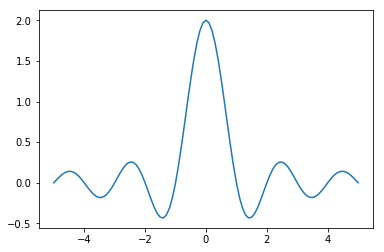

In [57]:
def cosfunc(x, k):
    return np.cos(k*np.pi*x)
    
def fourier_cos_transform(func, lim=[-1,+1]):
    
    result = []
    kvals = np.linspace(-5,5,101)
    for k in kvals:
        tmp = integrate.quad( cosfunc, lim[0], lim[1], args=(k,) )
        result.append(tmp[0])      
    return np.array(result), kvals
        
y, k = fourier_cos_transform( gfunc )
plt.plot(k, y)

## Factory function

The return statement in a Python function is used to pass information back to the caller.  This could be a True/False status, some value, or a list, or really *anything* you want.  

It is also possible to define functions inside other functions.  Note that when the inner function is defined

In [98]:
def outerfunc(x, n=3):
    
    def innerfunc(x):
        return x**n
    
    return innerfunc

test = outerfunc(2.0, 5.0)
print( type(test), test )
print( test(4.0) )

<class 'function'> <function outerfunc.<locals>.innerfunc at 0x000000000AF5B158>
1024.0


In [99]:
test3 = outerfunc(2.0, 3.0)
print( type(test3), test3 )
print( test3(4.0) )

test5 = outerfunc(2.0, 5.0)
print( type(test5), test5 )
print( test5(4.0) )

<class 'function'> <function outerfunc.<locals>.innerfunc at 0x000000000BC03AE8>
64.0
<class 'function'> <function outerfunc.<locals>.innerfunc at 0x000000000EF3FAE8>
1024.0


In [100]:
def outerfunc(x, n=3):   
    return lambda x: x**n

test = outerfunc(2.0, 5.0)
print( type(test), test )
print( test(4.0) )

<class 'function'> <function outerfunc.<locals>.<lambda> at 0x000000000AF5B0D0>
1024.0


In [101]:
def inner_product(func1, func2, lim=[-np.infty,+np.infty]):
    
    func = lambda x: func1(x)*func2(x)
    result = integrate.quad( func, lim[0], lim[1] )
    return result

In [102]:
def cos_func_factory(n):
    twopi = 2 * np.pi
    func = lambda x: np.cos(twopi * n * x)
    return func

In [105]:
cos_func = lambda x: np.cos(2.0*np.pi*x)    
print( inner_product( outerfunc(x,5), cos_func_factory(1), [0, 1] ) )

(0.08815404609785595, 4.726447190400961e-15)


## Write functions to numerically evaluate each of the the cosine and sine transforms

  $$ F_s(k) = \sqrt{\frac{1}{\pi}} \int_{-\infty}^{+\infty} f(x) \; \sin(2\pi x k) \; dx $$
  
   $$ F_c(k) = \sqrt{\frac{1}{\pi}} \int_{-\infty}^{+\infty} f(x) \; \cos(2\pi x k) \; dx $$

In [305]:
def sin_factory(k):
    func = lambda x: np.sin(2*np.pi * k * x)
    return func

def cos_factory(k):
    func = lambda x: np.cos(2*np.pi * k * x)
    return func

def custom_func(x,k):   
    return lambda x: np.exp(-i*k*x*2*np.pi)


def sin_T(func1,func2,lim=[-np.infty,np.infty]):

    funct= lambda x: func1(x)*func2(x)
    r1,r2=integrate.quad(funct,lim[0],lim[1])
    
    return r1,r2


In [306]:
kvals=np.linspace(-5,5,101)

result=[]

for k in kvals:
    
    re=sin_T(gfunc,cos_factory(k))
    result.append(re)

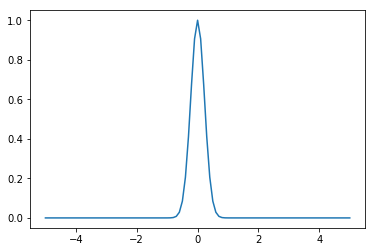

In [307]:
plt.plot(kvals,np.array(result)[:,0])
plt.show()

## Write a function to numerically evaluate the Fourier transform.

https://en.wikipedia.org/wiki/Fourier_transform
    
$$ F(k) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x) \; e^{-ikx} \; dx $$

In [1]:
funcx = sx*exp(-sa*sx**2)
funck = sine_transform( funcx, sx, sk)
print(funck)
#sympy.plot( [func.subs(a,2), func.subs(a,1)], (x, -5, +5), label='a=1' )

NameError: name 'sx' is not defined

In [62]:
k=np.linspace(-5,5,99)

def sin(x):
    return np.sin(2*np.pi*x)


def sin_T(f_input,k,lim=[-1,1]):

    result=[]
    
    for kvals in k:
        func= sin(x)
        tmp=integrate.quad(func,lim[0],lim[1],args=(k,))
        
    return np.array(result),k

In [63]:
sin_T(func1,k)

ValueError: invalid callable given

In [ ]:
def cosfunc(x, k):
    return np.cos(k*np.pi*x)
    
def fourier_cos_transform(func, lim=[-1,+1]):
    
    result = []
    kvals = np.linspace(-5,5,101)
    for k in kvals:
        tmp = integrate.quad( cosfunc, lim[0], lim[1], args=(k,) )
        result.append(tmp[0])      
    return np.array(result), kvals
        
y, k = fourier_cos_transform( gfunc )
plt.plot(k, y)

## Additional reading

http://calebmadrigal.com/fourier-transform-notes/